# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('../data/boston_data.csv')

In [3]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
housing.info() # all variables are numeric
               # there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [5]:
housing.describe() # no outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

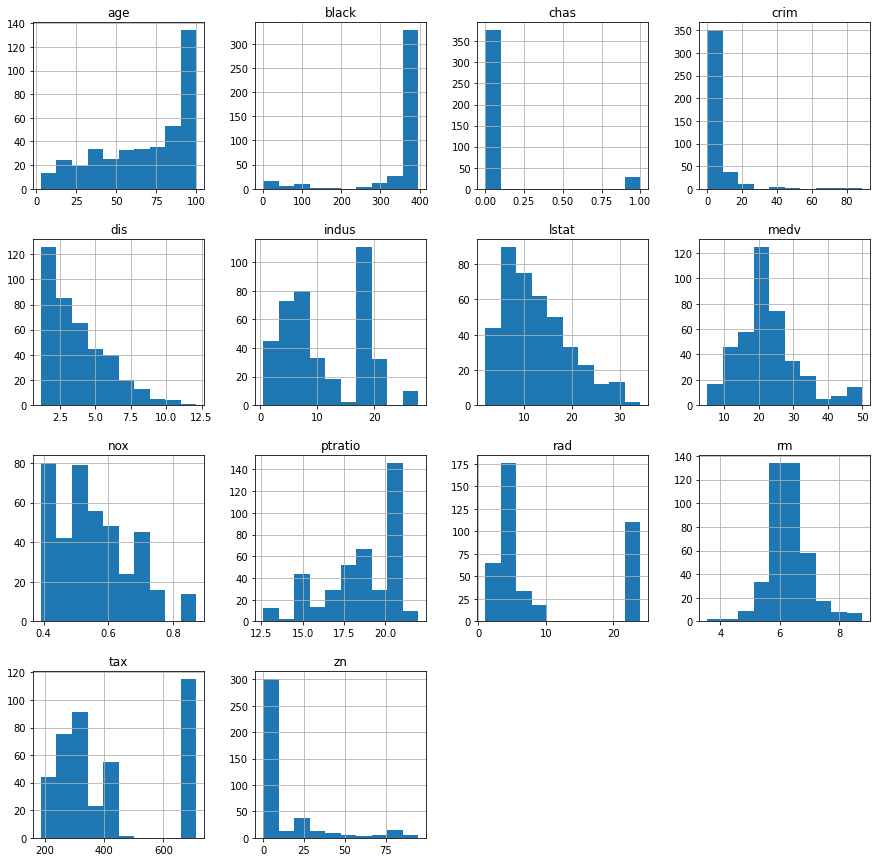

In [6]:
housing.hist(figsize=(15,15))
plt.show()

In [7]:
housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7



mdev and crim: correlation -0.4009558757372439


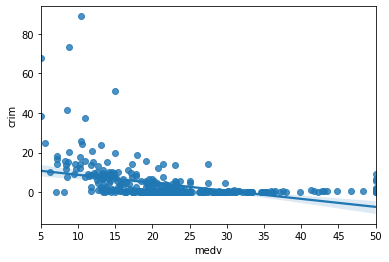


mdev and rm: correlation 0.683540993926214


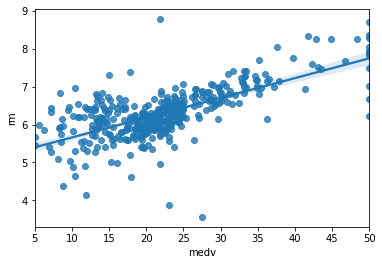


mdev and dis: correlation 0.26487595153417764


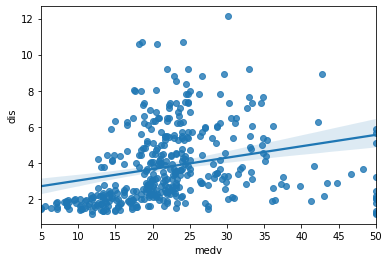


mdev and rad: correlation -0.4235083975722878


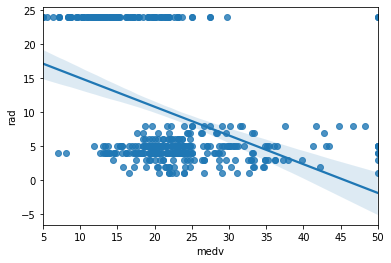


mdev and lstat: correlation -0.7426954940642158


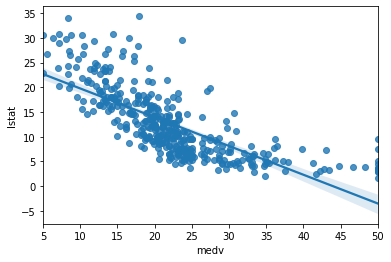

In [8]:
variables = ['crim', 'rm', 'dis', 'rad', 'lstat'] # variables that might be correlated

for i in variables:
    print (f"\nmdev and {i}: correlation {(housing['medv'].corr(housing[i]))}")
    sns.regplot(x='medv',y=i , data=housing)
    plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [9]:
"""
- I would have expected stronger correlation between crim rate and prices. Although 
it is only -0.4, we can see how for areas with higher crime rates the prices are in
the lower end.
- The rest of the correlations are what I expected
"""

'\n- I would have expected stronger correlation between crim rate and prices. Although \nit is only -0.4, we can see how for areas with higher crime rates the prices are in\nthe lower end.\n- The rest of the correlations are what I expected\n'

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

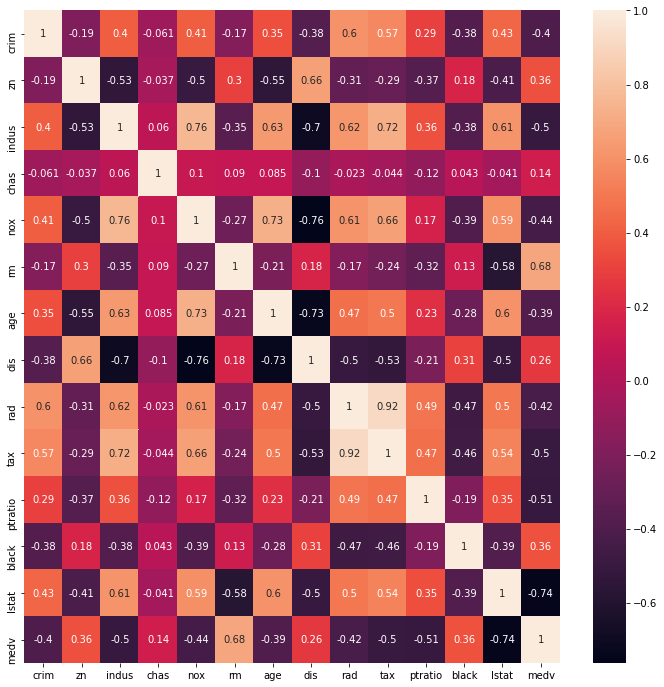

In [10]:
corr_matrix = housing.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [11]:
"""
I did not expect the high correlation between rad and tax
"""

'\nI did not expect the high correlation between rad and tax\n'

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [12]:
housing.medv.describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [13]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [14]:
from sklearn.model_selection import train_test_split

X = housing.drop('medv', axis=1).copy()
y = housing.medv
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = 123)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [15]:
from sklearn.ensemble import RandomForestRegressor

# creating function that returns r2 score
    # X_fit and y_fit are the datasets used to fit the model
    # X_pred is the X dataset used to predict new values
    # y_true are the real values of the train/test set of the values we predicted
    
def RFR(depth, X_fit, y_fit, X_pred, y_true):
    regr = RandomForestRegressor(max_depth=depth, random_state=123)
    regr.fit(X_fit, y_fit)
    y_pred = regr.predict(X_pred)
    return r2_score(y_true, y_pred)

In [16]:
# appending results to lists
r2_score_train = []
r2_score_test = []

# max_depth = 2
r2_score_train.append(RFR(2, train_X, train_y, train_X, train_y)) # train
r2_score_test.append(RFR(2, train_X, train_y, test_X, test_y)) # test

# max_depth = 4
r2_score_train.append(RFR(4, train_X, train_y, train_X, train_y)) # train
r2_score_test.append(RFR(4, train_X, train_y, test_X, test_y)) # test

# max_depth = 6
r2_score_train.append(RFR(6, train_X, train_y, train_X, train_y)) # train
r2_score_test.append(RFR(6, train_X, train_y, test_X, test_y)) # test

# max_depth = 8
r2_score_train.append(RFR(8, train_X, train_y, train_X, train_y)) # train
r2_score_test.append(RFR(8, train_X, train_y, test_X, test_y)) # test

# max_depth = 10
r2_score_train.append(RFR(10, train_X, train_y, train_X, train_y)) # train
r2_score_test.append(RFR(10, train_X, train_y, test_X, test_y)) # test

print(r2_score_train)
print(r2_score_test)

[0.7743707166575141, 0.9100460163367152, 0.9501441239677784, 0.9655892834812158, 0.9707196631490611]
[0.7546474964741571, 0.8206387339777192, 0.8484193829881406, 0.8539362630059497, 0.8556351070549458]


Now, plot the score for each tree on the training set and on the testing set.

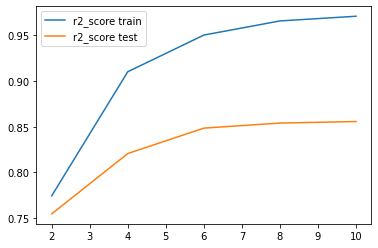

In [17]:
# Produce a plot with the score for the testing and training for the different max depths

max_depth = [2,4,6,8,10]

plt.plot(max_depth, r2_score_train, label='r2_score train')
plt.plot(max_depth, r2_score_test, label='r2_score test')
plt.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [18]:
"""
Increasing the depth improves the performance of the model, however the results are 
most noticeable for lower depths. From depth=8 to depth=10, the r2 does not improve by
that much.
"""

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [19]:
"""
Depth 1: High bias
Depth 10: High variance
"""

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [32]:
print('Max_depth=10')
print('Train:', RFR(10, train_X, train_y, train_X, train_y)) # train
print('Test:', RFR(10, train_X, train_y, test_X, test_y)) # test

print('\nMax_depth=11')
print('Train:', RFR(11, train_X, train_y, train_X, train_y)) # train
print('Test:', RFR(11, train_X, train_y, test_X, test_y)) # test

print('Depth 10 is the optimal, as with higher depths the model is overfitted and the r2 score for the test score decreases')

Max_depth=10
Train: 0.9707196631490611
Test: 0.8556351070549458

Max_depth=11
Train: 0.9716232564990924
Test: 0.8549639131307566
Depth 10 is the optimal, as with higher depths the model is overfitted and the r2 score for the test score decreases


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?* 
Data from 1978 will not be relevant for today, neither the data or the target variables
- *Are the features present in the data sufficient to describe a home?* 
No, there are more features people take into account today (number of bathrooms, garage...)
- *Is the model robust enough to make consistent predictions?* 
The model is good but it only has 404 instances, thus we would not say it is robust as we would need more data
- *Would data collected in an urban city like Boston be applicable in a rural city?* 
No, as the factors of importance between urban and rural areas will be different. 

